In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [37]:
df=pd.read_csv('cardio_train.csv', sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [39]:
# convert age days->year
df['age'] = df['age']/365

In [40]:
# check null value exist
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [41]:
# check duplicate value
df.duplicated().sum()

np.int64(0)

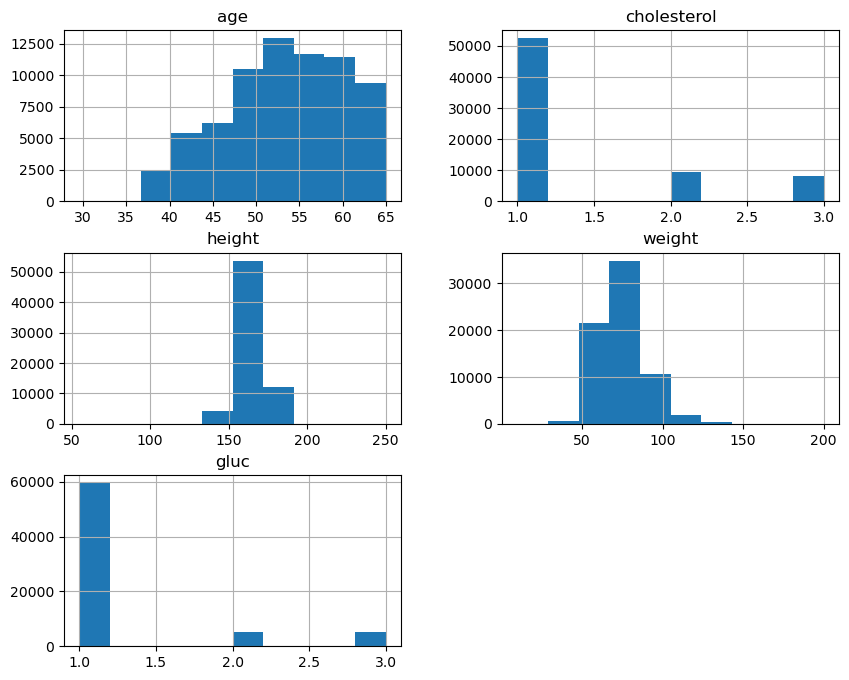

In [42]:
# check data distribution 
df[['age', 'cholesterol', 'height', 'weight',  'gluc']].hist(figsize=(10,8))
plt.show()

<Axes: ylabel='age'>

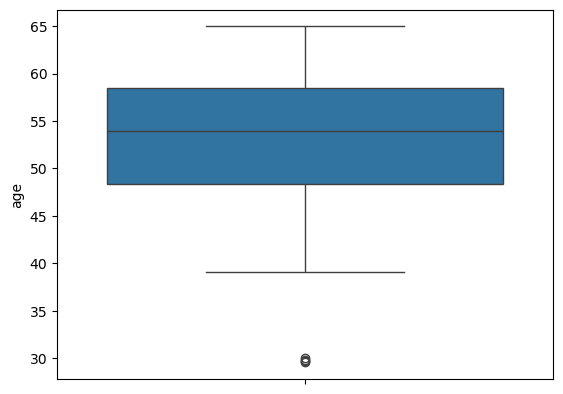

In [43]:
sns.boxplot(df['age'])  # no outliers in age column

In [44]:
scaler = StandardScaler()
df['age_scaled'] = scaler.fit_transform(df[['age']])

<Axes: ylabel='height'>

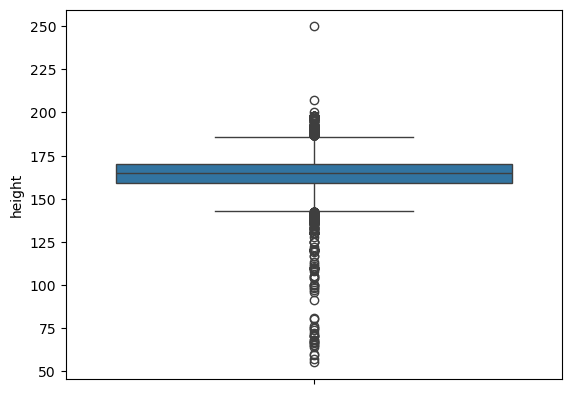

In [45]:
sns.boxplot(df['height'])

In [46]:
# apply condition
df = df[(df['height']>=130) & (df['height']<=200)]

<Axes: ylabel='height'>

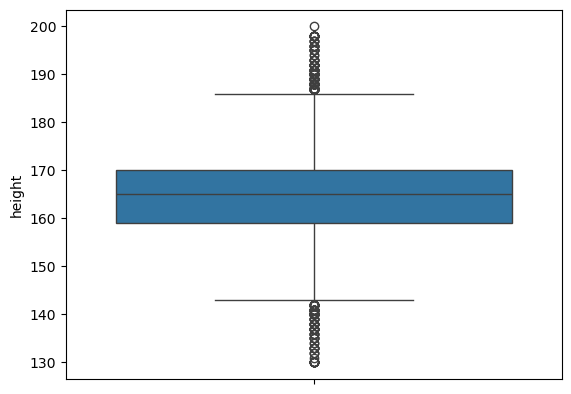

In [47]:
sns.boxplot(df['height'])

<Axes: ylabel='weight'>

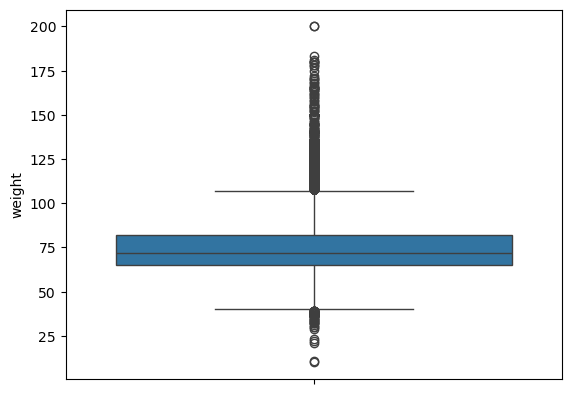

In [48]:
sns.boxplot(df['weight'])

In [49]:
# apply conditioin on weight
df = df[(df['weight'] >= 30) & (df['weight'] <= 200)]

<Axes: ylabel='weight'>

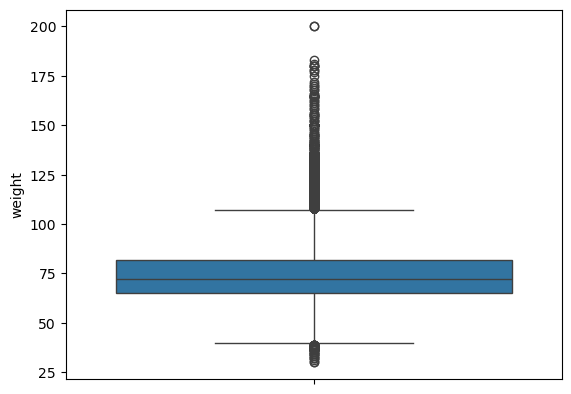

In [50]:
sns.boxplot(df['weight'])

In [51]:
# convert height and weight to BMI
df['BMI'] = df['weight'] / (df['height'] / 100)**2
df[['weight','height','BMI']].head()

,weight,height,BMI
0,62.0,168,21.967120
1,85.0,156,34.927679
2,64.0,165,23.507805
3,82.0,169,28.710479
4,56.0,156,23.011177


In [52]:
# use standard scalar on BMI
df['height_scaled'] = scaler.fit_transform(df[['height']])
df['weight_scaled'] = scaler.fit_transform(df[['weight']])

In [53]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_scaled,BMI,height_scaled,weight_scaled
0,0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0,-0.436062,21.967120,0.453326,-0.850074
1,1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1,0.307686,34.927679,-1.073923,0.752435
2,2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1,-0.247997,23.507805,0.071514,-0.710725
3,3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1,-0.748152,28.710479,0.580597,0.543412
4,4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0,-0.808543,23.011177,-1.073923,-1.268120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52.712329,2,168,76.0,120,80,1,1,1,0,1,0,-0.092762,26.927438,0.453326,0.125366
69996,99995,61.920548,1,158,126.0,140,90,2,2,0,0,1,1,1.269492,50.472681,-0.819382,3.609081
69997,99996,52.235616,2,183,105.0,180,90,3,1,0,1,0,1,-0.163286,31.353579,2.362388,2.145921
69998,99998,61.454795,1,163,72.0,135,80,1,2,0,0,0,1,1.200589,27.099251,-0.183028,-0.153331


In [54]:
df = df.drop('BMI', axis=1)

In [55]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_scaled,height_scaled,weight_scaled
0,0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0,-0.436062,0.453326,-0.850074
1,1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1,0.307686,-1.073923,0.752435
2,2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1,-0.247997,0.071514,-0.710725
3,3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1,-0.748152,0.580597,0.543412
4,4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0,-0.808543,-1.073923,-1.268120


<Axes: ylabel='ap_hi'>

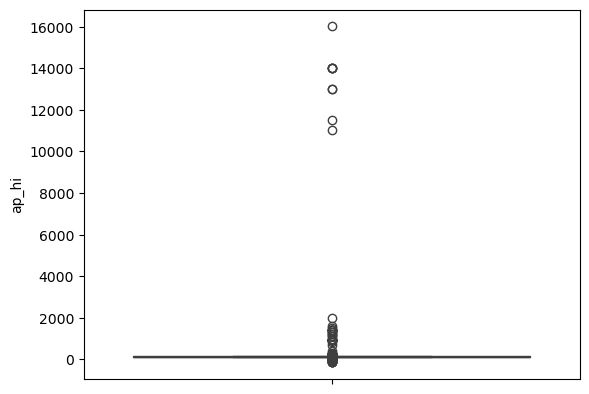

In [56]:
# check outliers in ap_hi
sns.boxplot(df['ap_hi'])

In [57]:
# remove outliers on ap_hi column
df = df[(df['ap_hi']>=80) & (df['ap_hi']<=200)]

<Axes: ylabel='ap_hi'>

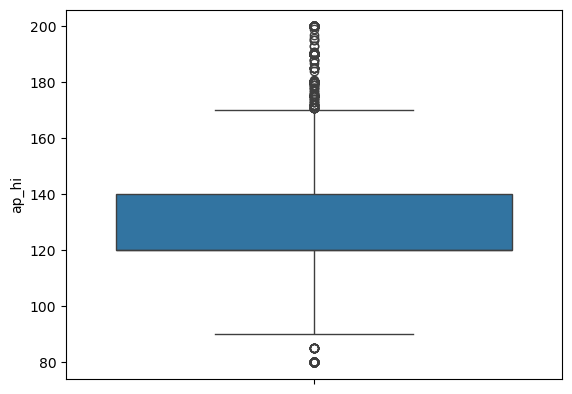

In [58]:
sns.boxplot(df['ap_hi'])

<Axes: xlabel='ap_hi', ylabel='Count'>

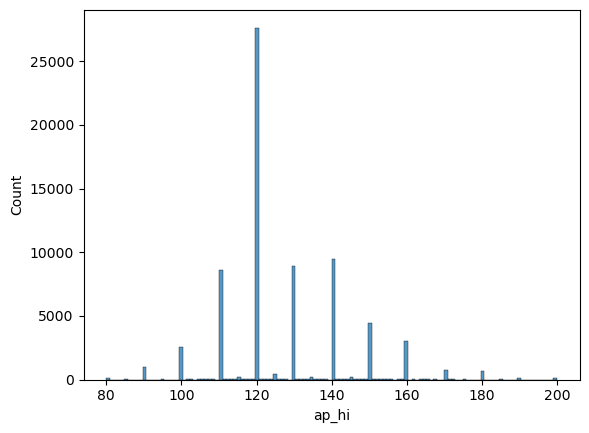

In [59]:
# check distribution in ap_lo
sns.histplot(df['ap_hi'])

<Axes: ylabel='ap_lo'>

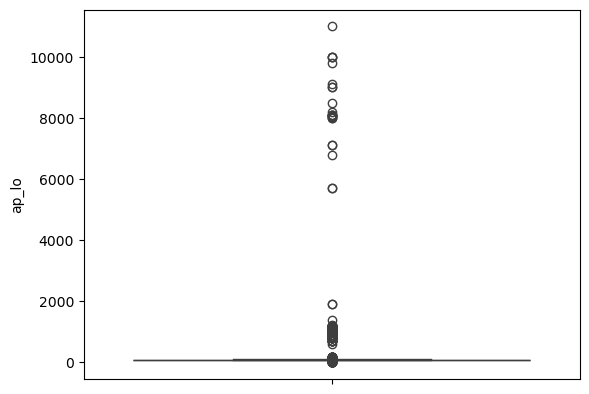

In [60]:
# check outliers in ap_lo
sns.boxplot(df['ap_lo'])

In [61]:
# remove outliers in ap_lo column
df = df[(df['ap_lo']>=50) & (df['ap_lo']<=120)]

<Axes: ylabel='ap_lo'>

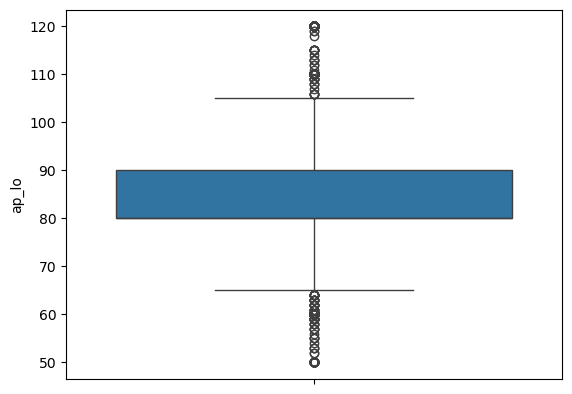

In [62]:
sns.boxplot(df['ap_lo'])

<Axes: xlabel='ap_lo', ylabel='Count'>

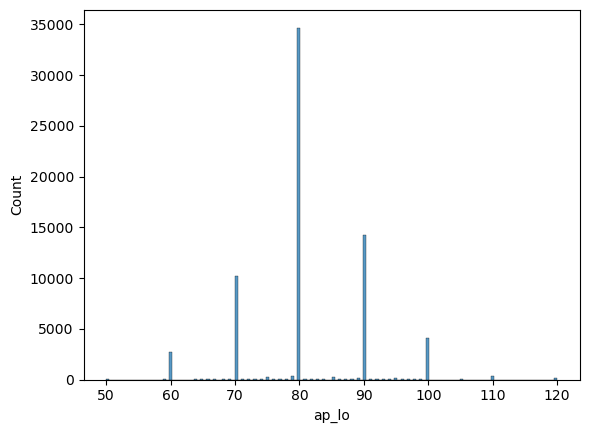

In [63]:
# check distributioin of ap_lo 
sns.histplot(df['ap_lo'])

In [64]:
# use standard on ap_lo and ap_hi
df['ap_lo_scaled'] = scaler.fit_transform(df[['ap_lo']])
df['ap_hi_scaled'] = scaler.fit_transform(df[['ap_hi']])

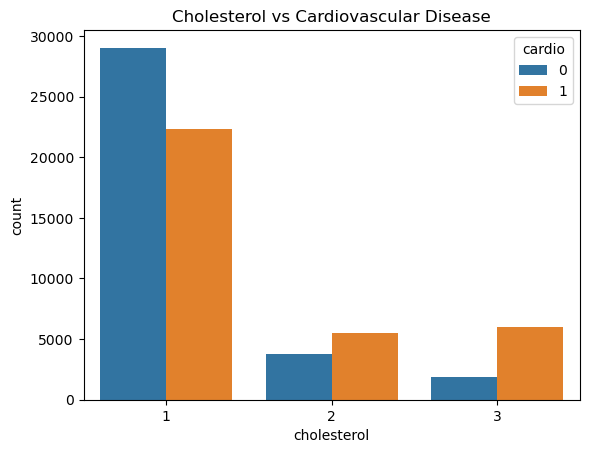

In [65]:
sns.countplot(x='cholesterol', hue='cardio', data=df)
plt.title("Cholesterol vs Cardiovascular Disease")
plt.show()

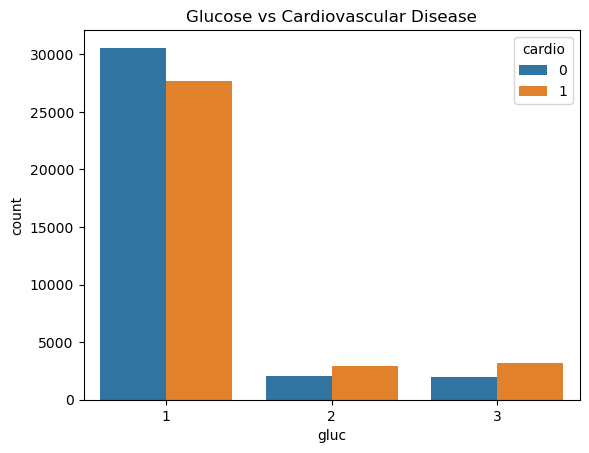

In [66]:
sns.countplot(x='gluc', hue='cardio', data=df)
plt.title("Glucose vs Cardiovascular Disease")
plt.show()
# higher glucose level -> high chance of disease

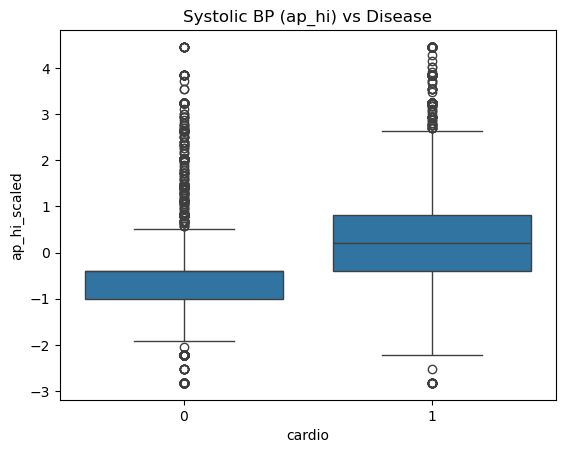

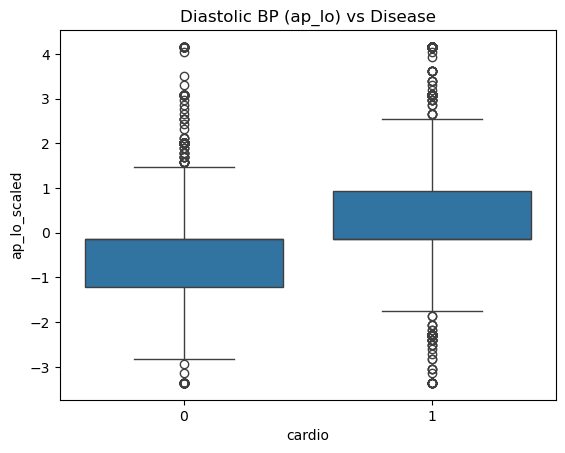

In [67]:
sns.boxplot(x='cardio', y='ap_hi_scaled', data=df)
plt.title("Systolic BP (ap_hi) vs Disease")
plt.show()
# high ap_hi -> high chance of disease

sns.boxplot(x='cardio', y='ap_lo_scaled', data=df)
plt.title("Diastolic BP (ap_lo) vs Disease")
plt.show()
# high ap_lo -> high chance of disease

# Among the two, systolic BP (ap_hi) shows a stronger shift than diastolic BP (ap_lo), 
# suggesting that systolic hypertension may play a sxmore dominant role in cardiovascular disease risk

In [68]:
data = df[df['ap_lo_scaled'] < df['ap_hi_scaled']]

In [70]:
df.shape

(68507, 18)

In [71]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_scaled,height_scaled,weight_scaled,ap_lo_scaled,ap_hi_scaled
0,0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0,-0.436062,0.453326,-0.850074,-0.137931,-1.005258
1,1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1,0.307686,-1.073923,0.752435,0.935137,0.815702
2,2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1,-0.247997,0.071514,-0.710725,-1.210998,0.208716
3,3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1,-0.748152,0.580597,0.543412,2.008204,1.422689
4,4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0,-0.808543,-1.073923,-1.268120,-2.284065,-1.612245


In [72]:
# remove column (not usefull and redundant)
df = df.drop(['age', 'id', 'ap_hi', 'ap_lo', 'height', 'weight'], axis=1)

In [74]:
df.head()

,gender,cholesterol,gluc,smoke,alco,active,cardio,age_scaled,height_scaled,weight_scaled,ap_lo_scaled,ap_hi_scaled
0,2,1,1,0,0,1,0,-0.436062,0.453326,-0.850074,-0.137931,-1.005258
1,1,3,1,0,0,1,1,0.307686,-1.073923,0.752435,0.935137,0.815702
2,1,3,1,0,0,0,1,-0.247997,0.071514,-0.710725,-1.210998,0.208716
3,2,1,1,0,0,1,1,-0.748152,0.580597,0.543412,2.008204,1.422689
4,1,1,1,0,0,0,0,-0.808543,-1.073923,-1.268120,-2.284065,-1.612245


In [77]:
features = [
    'gender', 'height_scaled', 'weight_scaled',
    'cholesterol', 'gluc', 'smoke', 'alco', 'active',
    'age_scaled', 'ap_hi_scaled', 'ap_lo_scaled'
]
target = 'cardio'


In [78]:
from sklearn.model_selection import train_test_split

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42,
                                                    stratify=y)


In [79]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=2000)

In [80]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.7263903079842359
              precision    recall  f1-score   support

           0       0.71      0.79      0.74      6929
           1       0.75      0.67      0.71      6773

    accuracy                           0.73     13702
   macro avg       0.73      0.73      0.73     13702
weighted avg       0.73      0.73      0.73     13702

[[5446 1483]
 [2266 4507]]
